# NOTES FOR USER:
## Input file:
- Future primer spreadsheets should follow Claire's spreadsheet, using **Excel**. 
- Naming convention for your primer spreadsheet should always be an **Excel** spreadsheet named **'Firstname Lastname.xls' **or** '.xlsx'**.

## Output file:
- Output file of primer matches (sequence_matches.xlsx') is in the parent folder (the folder above the one that contains all the sequences).
- If you put more than one sequence to analyze, the primer matches for each sequence will be separated into different sheets within the excel file, in order of how you put it in.

Best wishes,
Candice

- - - 

In [1]:
import pandas as pd
import os
%matplotlib inline

In [2]:
def split_col(row):
    try:
        row_col = row.Row[1:]
    except TypeError:
        row_col = 'NaN'
    else:
        return row_col
    
def split_row(row):
    try:
        row_Row = row.Row[0]
    except TypeError:
        row_Row = 'NaN'
    else:
        return row_Row

In [15]:
# dictionary to reverse transcribe sequences
rev_xcr = {'a':'t', 'c':'g', 'g':'c', 't':'a'}

# read in files from lab members

# Candice
df = pd.read_csv('Candice Yip.csv')
df.columns = ['Date', 'Box', 'Row', 'Col', 'Name', 'Sequence', 'Misc', 'Other']
df['LabMember'] = 'Candice Yip'
df.Date = df.Date.fillna(method='ffill')

# Standard promoters from Eton
temp_std = pd.read_excel('StandardPrimers.xlsx')
temp_std['LabMember'] = 'Eton Primer'
temp_std['Box'] = 'NaN'
temp_std['Row'] = 'NaN'
temp_std['Col'] = 'NaN'
temp_std['Misc'] = 'NaN'
temp_std['Other'] = 'NaN'
temp_std['Date'] = 'NaN'
temp_std = temp_std[['Date', 'Box', 'Row', 'Col', 'Name', 'Sequence', 'Misc', 'Other', 'LabMember']]

# Elizabeth
temp_elizabeth = pd.read_excel('Elizabeth Lamkin.xlsx')
temp_elizabeth.columns = ['Name', 'Sequence', 'Box', 'Row', 'Col', 'Misc', 'Other']
temp_elizabeth['LabMember'] = 'Elizabeth Lamkin'
temp_elizabeth['Date'] = 'NaN'
temp_elizabeth = temp_elizabeth[['Date', 'Box', 'Row', 'Col', 'Name', 'Sequence', 'Misc', 'Other', 'LabMember']]

# Karolina
temp_Kar = pd.read_excel('Karolina Mizeracka.xlsx', sheetname = 'KM primers')
temp_Kar['Other'] = temp_Kar['Unnamed: 9']
temp_Kar.columns = ['Box', 'Row', 'Name', 'Sequence', 'Date', 'Misc', 'U6', 'U7', 'U8', 'U9', 'U10', 'Other']
temp_Kar['LabMember'] = 'Karolina Mizeracka'
temp_Kar['Col'] = temp_Kar.apply(split_col, axis=1)
temp_Kar.Row = temp_Kar.apply(split_row, axis=1)
temp_Kar = temp_Kar[['Date', 'Box', 'Row', 'Col', 'Name', 'Sequence', 'Misc', 'Other', 'LabMember']]

# Max
temp_Max = pd.read_excel('Max Heiman.xls')
temp_Max.columns = ['OldBox', 'Box', 'Name', 'Sequence', 'Row', 'Col', 'Date', 'Misc']
temp_Max['LabMember'] = 'Max Heiman'
temp_Max['Other'] = 'NaN'
temp_Max = temp_Max[['Date', 'Box', 'Row', 'Col', 'Name', 'Sequence', 'Misc', 'Other', 'LabMember']]

In [4]:
df = df.append(temp_std, ignore_index=True)
df = df.append(temp_elizabeth, ignore_index=True)
df = df.append(temp_Max, ignore_index=True)
df = df.append(temp_Kar, ignore_index=True)

In [5]:
for file in os.listdir():
    if file not in ['.DS_Store', '.ipynb_checkpoints', 'Candice.csv', 'Elizabeth.xlsx', 'Karolina.xlsx', 'Max.xls','Primers search.ipynb', 'StandardPrimers.xlsx']:
        try:
            temp = pd.read_excel(file)
            try:
                temp.columns = ['Name', 'Sequence', 'Date', 'Box', 'Row', 'Misc']
                temp['Other'] = 'NaN'
            except ValueError:
                temp.columns = [['Name', 'Sequence', 'Date', 'Box', 'Row', 'Misc', 'Other']]

            temp['LabMember'] = file.split('.')[0]
            temp['Col'] = temp.apply(split_col, axis=1)
            temp.Row = temp.apply(split_row, axis=1)        
            temp = temp[['Date', 'Box', 'Row', 'Col', 'Name', 'Sequence', 'Misc', 'Other', 'LabMember']]
            df = df.append(temp, ignore_index=True)
        except:
            print ('Could not read', file)
            pass


In [6]:
print ('Number of primers by lab member: ')
print (df.groupby('LabMember').Name.count())

Number of primers by lab member: 
LabMember
Candice Yip           390
Claire Williams       171
Elizabeth Lamkin      351
Eton Primer            23
Isabel Low            116
Karolina Mizeracka    385
Max Heiman            712
Megan Chong            98
Name: Name, dtype: int64


# Clean sequence input from user

Clean up input sequence from user.

In [7]:
print ('Paste your sequence to find primers. Uppercase or lowercase, spaces, and line breaks allowed.')
sequence = input('You can input more than one sequence, just separate sequences with a semicolon: ')
print ()

# test sequence
# sequence = 'tagttcatccatgccaaaa;   actgactga tg aatttaactttgacgg ACGTACGT \n ; aaaaagggggcgatactggtactaa; acgtacgatgcatgcatgcatgctga atttaactttgacgg aaacgctactgacgtacgatacgatctgactga agtatctcatgactg'
# sequence = 'acgtacgatgcatgcatgcatgctga atttaactttgacgg aaacgctactgacgtacgatacgatctgactga agtatctcatgactg'
# sequence = 'tgtaaaacgacggccagtgaatt'
# for_sequencing = input("Are you looking for sequencing primers for these sequences? y/n: ")

# split if multiple sequences
sequence_list = sequence.split(sep=';')

# clean up sequence(s)
temp_list = []
for sequence in sequence_list:
    sequence = sequence.lower().replace(" ", "").strip(' \t\n\r')
    for base in sequence:
        if base not in ['a', 'g', 'c', 't']:
            print ('Error. Your sequence contains letters other than base pairs (a, g, c, t)')
            break
    temp_list.append(sequence)

sequence_list = temp_list

Paste your sequence to find primers. Uppercase or lowercase, spaces, and line breaks allowed.
You can input more than one sequence, just separate sequences with a semicolon: AAGCTTGCATGCCTGCAGGTCgacCGTAATGTATGCAGTGACCGtactgatcattttaaaaacaaatttgcaaatgtttcacaaatcctagcttgacacataaaacttgcagagttcgtcttaacatacataattcaaatagttcttaattcaaatagttctcataattcaaatagttcccaaaggtgttcccaaaattattggtgcatagaatttttttttaatttctgaaaaaagcaaacataaacccctgttatctgaaaaatgtagtagcgaatgaaacttgcacacactgtaaaataaatcaattcatttgcatttcccacgtggaaacagttttctaagaatatatttcttgcaacaaaacctctactttattgccacctggtttcttcgtattaatgaacgttcactgtgctaattaaggtatcgagatgatccggttagagcggtatgccttctttcacccaggtggtgctcattatcggtgcggttgtattcatgaaatacaactttgctttgacattgccgaatttacaattgtgtgtccaaaagggccacctgaatatgcaatatcagtctcatgctaattaagtgaatgtatatgatgtattgctggtgataaacacttatcgtgtatgttctctcactaattatttatatcctttgcaatgtcggttgcctagttgagcccgcccatttgcgtgtcatagaaacttgtcctccacattgaaaggtaagtacgacatgccggttggtcccagcaagtctcgacgatctatcatttctgtccacatattggctctcgttttgctccactttccgc

# Clean primers dataframe

Clean primer sequences.

In [8]:
def clean_primer(primer):
    try:
        primer = primer.lower().replace(" ", "").strip()
        for base in primer:
            if base not in ['a', 'g', 'c', 't']:
                print ('Warning: One or more of your primers had stuff that were not dna bases. I replaced them with null values.')
                primer = 'NaN'
                break
    except AttributeError:
        primer = 'NaN'
    return primer
    
df.Sequence = df['Sequence'].apply(clean_primer)

Clean box and column floats.

In [9]:
def integerize_locations(box):
    try:
        if box.startswith('IL'):
            return str(int(box[-1]))
        else:
            return str(int(box))
    except:
        return 'NaN'
df['Box'] = df['Box'].apply(integerize_locations)
df['Col'] = df['Col'].apply(integerize_locations)

Get forward and reverse primer segments (15 nucleotides from 3' end), which we will use to match input sequence.

In [10]:
def forward_15(primer):
    try:
        primer_15 = primer[-15:]
    except:
        primer_15 = 'NaN'
    return primer_15
def reverse_15(primer):
    try:
        primer_rev = ""    

        # reverse transcribe
        for i in primer:
            primer_rev += rev_xcr[i]
        
        # flip order
        primer_rev = primer_rev[::-1]
        
        # grab first 15 nucleotides
        primer_rev_15 = primer_rev[:15]
        
    except:
        primer_rev_15 = 'NaN'
    return primer_rev_15

df['Forward_15'] = df['Sequence'].apply(forward_15)
df['Reverse_15'] = df['Sequence'].apply(reverse_15)

Locate forward and reverse primers in sequence.

In [11]:
def locateFprimer(row):
    locate_box = {}

    try:
        if type(row.Forward_15) == str and sequence.find(row.Forward_15) >= 0:
            locate_box[sequence.find(row.Forward_15)] = [row.Name,
                                                         'Fwd',
                                                         row.Box + row.Row + row.Col,
                                                         str(sequence.find(row.Sequence) != -1),
                                                         row.Sequence,
                                                         row.LabMember,
                                                         'Notes: '+ str(row.Misc) + '. Misc: ' + str(row.Other),
                                                         row.Date
                                                        ]
    except:
        pass
    
    if len(locate_box.keys()) > 0:
        return (locate_box)

    
    
def locateRprimer(row):
    locate_box = {}
    
    
    try:
        rev_seq = ""
        for base in row.Sequence:
            rev_seq += rev_xcr[base]
        rev_seq = rev_seq[::-1]
    except:
        pass
    
    try:
        if type(row.Reverse_15) == str and sequence.find(row.Reverse_15) >= 0:
            locate_box[sequence.find(row.Reverse_15)] = [row.Name, 
                                                         'Rev', 
                                                         row.Box + row.Row + row.Col,
                                                         str(sequence.find(rev_seq) != -1),
                                                         row.Sequence,
                                                         row.LabMember,
                                                         'Notes: '+ str(row.Misc) + '. Misc: ' + str(row.Other),
                                                         row.Date
                                                        ]
    except:
        pass
    
    if len(locate_box.keys()) > 0:
        return (locate_box)

Get locations and information for matching primers in each sequence.

In [12]:
all_matches = []
for sequence in sequence_list:
    df['fwd_match'] = df.apply(locateFprimer, axis=1)
    df['rev_match'] = df.apply(locateRprimer, axis=1)

    print ("For sequence", sequence[:7] + '...' + sequence[-7:], "there are", df.fwd_match.count(), "matching forward primers", 'and', df.rev_match.count(), 'matching reverse primers.')
    print ()
    matches_per_seq_F = df.fwd_match.dropna()
    matches_per_seq_R = df.rev_match.dropna()
    all_matches.append([matches_per_seq_F, matches_per_seq_R])

For sequence aagcttg...atgaaat there are 106 matching forward primers and 103 matching reverse primers.



In [13]:
def matches(match):
    match_dict = {}
    for i in match:
        if list(i.keys())[0] not in match_dict.keys():
            match_dict[list(i.keys())[0]] = [list(i.values())[0]]
        else:
            match_dict[list(i.keys())[0]].append(list(i.values())[0])
    return match_dict

def split_dict(match):
    fwd_dict = matches(match)
    fwd_dict_df = pd.DataFrame(pd.DataFrame.from_dict(fwd_dict, orient='index'))
    fwd_dict_df.sort_index(inplace=True)
    split_fwd_dict = pd.DataFrame(fwd_dict_df.stack(), columns=['all_info'])
    split_fwd_df = pd.DataFrame([x for x in split_fwd_dict.all_info], columns = ['Name', 'Dir', 'Location', 'Entire primer?', 'Primer', 'LabMember','Notes', 'Date'])
    split_fwd_df.index = split_fwd_dict.index
    return split_fwd_df

split_dfs = []

for n in range(len(all_matches)):
    fwd_matches = all_matches[n][0].tolist()
    rev_matches = all_matches[n][1].tolist()
    
    split_fwd_df = split_dict(fwd_matches)
    split_rev_df = split_dict(rev_matches)

    split_df = split_fwd_df.append(split_rev_df)
    split_dfs.append(split_df)

# write data to Excel
writer = pd.ExcelWriter('../sequence_matches.xlsx')
sheet_names = list(range(len(split_dfs)))
for name in sheet_names:
    split_dfs[name].to_excel(writer, sheet_name = str(name))
writer.save()

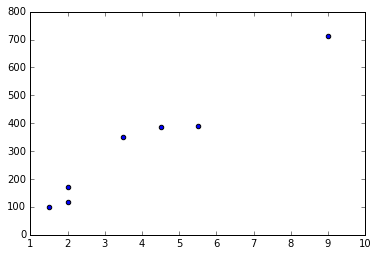

In [14]:
from matplotlib import pyplot
x = [5.5, 2, 3.5, 2, 4.5, 9, 1.5]
y = [390, 171, 351, 116, 385, 712, 98]
pyplot.scatter(x, y)
 